# Titanic

### Kaggle Kernal Link

https://www.kaggle.com/bilalyussef/tba-titanic

## Team Members

- Bilal Yussef.
- Talal Almutairi.
- Abdulrahman Alsalamah.

In [1]:
# General Libraries
import pandas as pd
import numpy as np
import random as rnd
from scipy import stats
from collections import Counter

# Cleaning and preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# visiualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
import matplotlib.gridspec as gridspec
%matplotlib inline
sns.set(style='white', context='notebook', palette='deep')
'''Customize visualization.'''
plt.style.use('bmh')                    # Use bmh's style for plotting
sns.set_style({'axes.grid':False})      # Remove gridlines
'''Display markdown formatted output like bold, italic bold etc.'''
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))

# modeling 

# Classification libraries and evaluation
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics #accuracy measure

# Regression Libraries
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Other models
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn import svm 

# To ignore unwanted warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

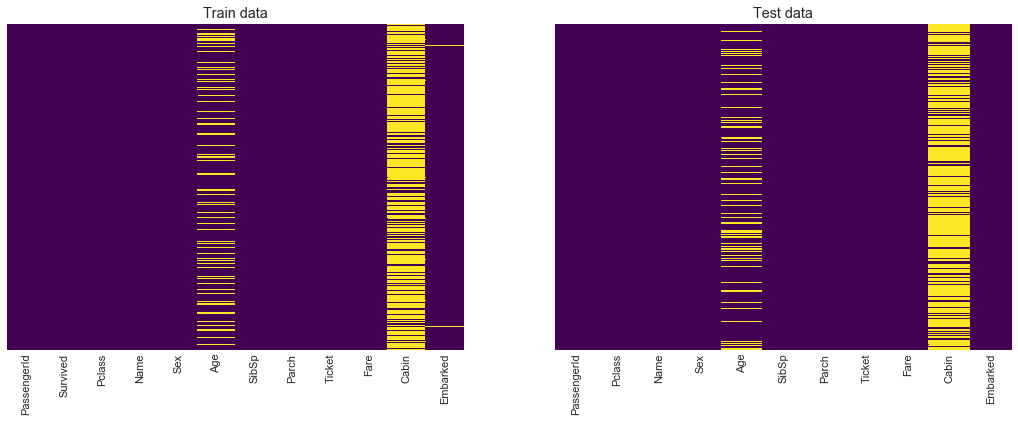

In [7]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))

# train data 
sns.heatmap(train.isnull(), yticklabels=False, ax = ax[0], cbar=False, cmap='viridis')
ax[0].set_title('Train data')

# test data
sns.heatmap(test.isnull(), yticklabels=False, ax = ax[1], cbar=False, cmap='viridis')
ax[1].set_title('Test data');

In [8]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
train.Embarked.fillna('S',inplace= True)

In [10]:
ME = train[train['Pclass'] == 3]['Fare'].mean()
test.Fare.fillna(ME,inplace=True)

In [11]:
train.groupby('Pclass').mean()[['Age']]

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [12]:
#defining a function 'impute_age'
def impute_age(age_pclass): # passing age_pclass as ['Age', 'Pclass']

    # Passing age_pclass[0] which is 'Age' to variable 'Age'
    Age = age_pclass[0]
    
    # Passing age_pclass[2] which is 'Pclass' to variable 'Pclass'
    Pclass = age_pclass[1]
    
    #applying condition based on the Age and filling the missing data respectively 
    if pd.isnull(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 30

        else:
            return 25

    else:
        return Age

In [13]:
# (for train) grab age and apply the impute_age, our custom function
train['Age'] = train.apply(lambda x: impute_age(x[['Age','Pclass']]), axis=1)
# (for test) grab age and apply the impute_age, our custom function 
test['Age'] = test.apply(lambda x: impute_age(x[['Age','Pclass']]), axis=1)
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [14]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [15]:
train['Cabin'] = train['Cabin'].apply(lambda x: 1 if pd.isnull(x) else 0)
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [16]:
test['Cabin'] = test['Cabin'].apply(lambda x: 1 if pd.isnull(x) else 0)
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

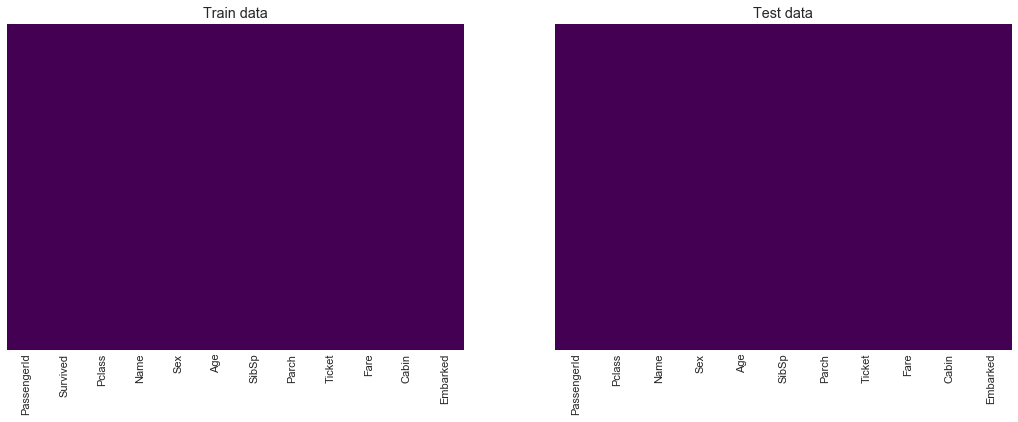

In [17]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))

# train data 
sns.heatmap(train.isnull(), yticklabels=False, ax = ax[0], cbar=False, cmap='viridis')
ax[0].set_title('Train data')

# test data
sns.heatmap(test.isnull(), yticklabels=False, ax = ax[1], cbar=False, cmap='viridis')
ax[1].set_title('Test data');

In [18]:
train = pd.get_dummies(train, columns=['Sex','Embarked'],drop_first=True)
train

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,1,0,1
5,6,0,3,"Moran, Mr. James",25.0,0,0,330877,8.4583,1,1,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,0,1,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.0750,1,1,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,1,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,1,0,0,0


In [19]:
test = pd.get_dummies(test, columns=['Sex','Embarked'],drop_first=True)


In [20]:
test

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,1,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,1,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,1,1,1,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,1,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,1,0,0,1
5,897,3,"Svensson, Mr. Johan Cervin",14.0,0,0,7538,9.2250,1,1,0,1
6,898,3,"Connolly, Miss. Kate",30.0,0,0,330972,7.6292,1,0,1,0
7,899,2,"Caldwell, Mr. Albert Francis",26.0,1,1,248738,29.0000,1,1,0,1
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",18.0,0,0,2657,7.2292,1,0,0,0
9,901,3,"Davies, Mr. John Samuel",21.0,2,0,A/4 48871,24.1500,1,1,0,1


In [21]:
train

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,1,0,1
5,6,0,3,"Moran, Mr. James",25.0,0,0,330877,8.4583,1,1,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,0,1,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.0750,1,1,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,1,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,1,0,0,0


In [22]:
X_train = train[['Pclass','Age','SibSp','Parch','Fare','Cabin','Sex_male','Embarked_Q','Embarked_S']]
y_train = train['Survived']
X_test = test[['Pclass','Age','SibSp','Parch','Fare','Cabin','Sex_male','Embarked_Q','Embarked_S']]

knn = KNeighborsClassifier()
knn_cv_accuracy =cross_val_score(knn, X_train, y_train, cv=5).mean()
print('Mean cross-validated accuracy for default knn:',knn_cv_accuracy)

Mean cross-validated accuracy for default knn: 0.6847180655843864


In [23]:
knn_params = {
    'n_neighbors': [5,9,15,25,40,50,60],
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan']}
print('Initialized parameters for Grid Search')
print(knn_params)

Initialized parameters for Grid Search
{'n_neighbors': [5, 9, 15, 25, 40, 50, 60], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}


In [24]:
knn_gridsearch = GridSearchCV(KNeighborsClassifier(), 
                              knn_params, 
                              n_jobs=-1, cv=5)
knn_gridsearch.fit(X_train, y_train)

knn_gridsearch.best_score_

0.7418630751964085

In [25]:
knn_gridsearch.best_params_

{'metric': 'manhattan', 'n_neighbors': 25, 'weights': 'distance'}

In [26]:
y_test = pd.read_csv('gender_submission.csv')
y_test.drop(columns= 'PassengerId',inplace=True)

In [27]:
y_test.columns

Index(['Survived'], dtype='object')

In [28]:
best_knn = knn_gridsearch.best_estimator_
best_knn.score(X_test, y_test)
y_test = best_knn.predict(X_test)

In [29]:
test['Survived'] = y_test

In [30]:
save_file = test[['PassengerId','Survived']]

In [31]:
save_file.to_csv('save_file.csv',index=False)

# random forest


In [32]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
y_rf = rf.predict(X_test)
rf.score(X_test,y_test)

0.8014354066985646

In [34]:
test['Survived'] = y_rf
save_file = test[['PassengerId','Survived']]
save_file.to_csv('save_file.csv',index=False)

In [35]:
et = ExtraTreesClassifier(n_estimators=100) # bootstrap=False by default #max_features='auto',
et.fit(X_train,y_train)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [36]:
y_et = rf.predict(X_test)
test['Survived'] = y_et
save_file = test[['PassengerId','Survived']]
save_file.to_csv('save_file.csv',index=False)

In [37]:
y_et

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [38]:
y_rf

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [39]:
rf_params = {
   'n_estimators': [10, 50, 100, 150, 200, 250],
   'max_features':[2, 3, 5, 7, 8],
    'max_depth': [1, 2, 3, 4, 5, 8],
   'criterion':['gini', 'entropy'],
}
rf_g = RandomForestClassifier(n_estimators=100)
gs = GridSearchCV(rf_g, param_grid=rf_params, cv=5, verbose = 1,n_jobs=-1)

gs.fit(X_train,y_train)
gs.score(X_train,y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   50.6s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  3.9min finished


0.9180695847362514

In [40]:
y_rf_g = gs.predict(X_test)
test['Survived'] = y_rf_g
save_file = test[['PassengerId','Survived']]
save_file.to_csv('save_file.csv',index=False)

In [41]:

rf_g = RandomForestClassifier(n_estimators=100)
random_ =cross_val_score(rf_g, X_train, y_train, cv=5)
random_

array([0.79888268, 0.7877095 , 0.85955056, 0.76966292, 0.85310734])